<a href="https://colab.research.google.com/github/Sanat-Nath/Berkeley-Data-science-bootcamp---Student-Performance-data-analysis/blob/main/StudentPerformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as df
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Student_performance = df.read_csv('StudentPerformance.csv')
Student_performance


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


Step 3: Checking if the Data is clean enough for me to proceed

In [ ]:
Student_performance.isnull().sum()
#If all the counts are 0, then I am good here.

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [ ]:
#This helps confirm that numbers are numeric and text is text.
Student_performance.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
#If everything is "Yes" and "No" consistently, then I know there are no errors for boolean Dtype
Student_performance["Extracurricular Activities"].value_counts()

,count
Extracurricular Activities,
No,5052
Yes,4948


**Step** 4: EDA

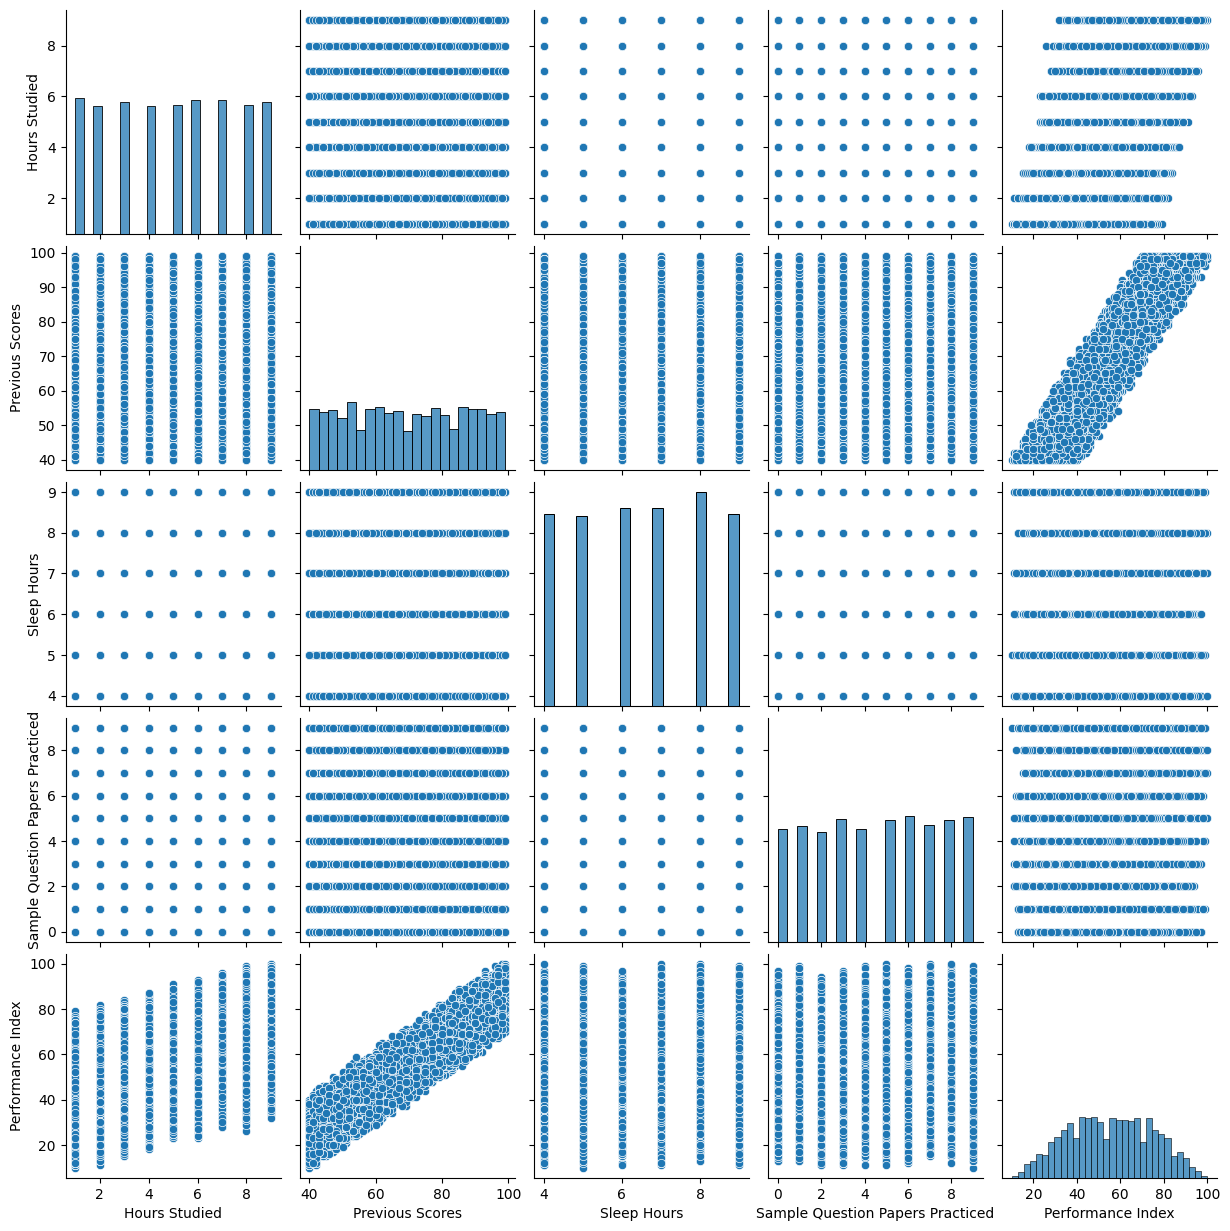

In [ ]:
#shows the many different ways to display our Data
sns.pairplot(Student_performance)
plt.show()
#However, they are very expensive and most likely not worth it for future use.

In [ ]:
#how strongly each variable relates to the target (Performance Index).
correlation = Student_performance.corr(numeric_only=True)
print(correlation["Performance Index"].sort_values(ascending=False))

Performance Index                   1.000000
Previous Scores                     0.915189
Hours Studied                       0.373730
Sleep Hours                         0.048106
Sample Question Papers Practiced    0.043268
Name: Performance Index, dtype: float64


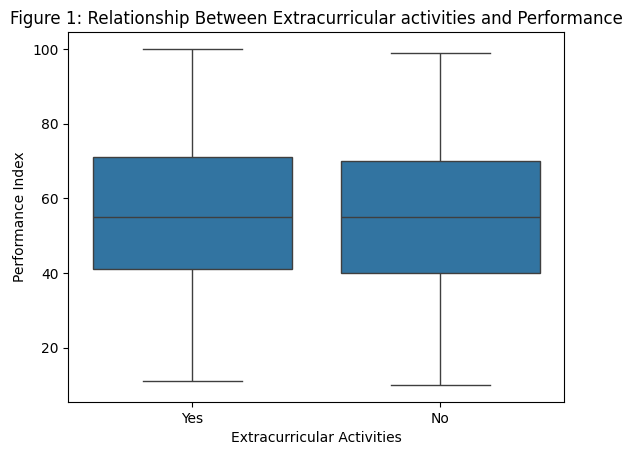

In [ ]:
sns.boxplot(x="Extracurricular Activities", y="Performance Index", data=Student_performance)
plt.title("Figure 1: Relationship Between Extracurricular activities and Performance")
plt.show()

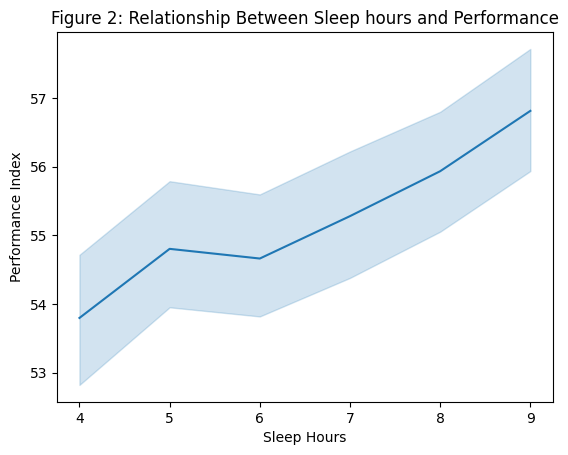

In [ ]:
sns.lineplot(x="Sleep Hours", y="Performance Index", data=Student_performance)
plt.title("Figure 2: Relationship Between Sleep hours and Performance")
plt.show()

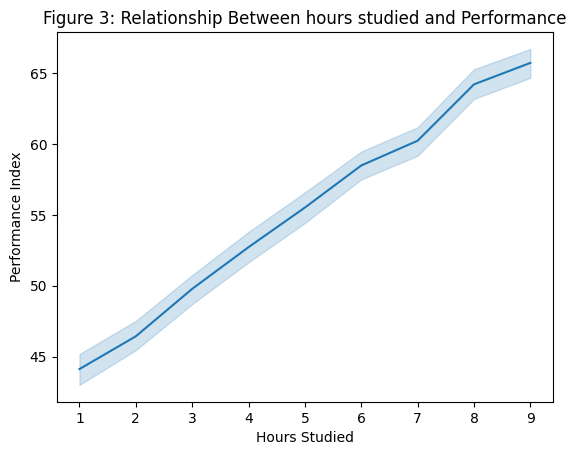

In [ ]:
sns.lineplot(x="Hours Studied", y="Performance Index", data=Student_performance)
plt.title("Figure 3: Relationship Between hours studied and Performance")
plt.show()

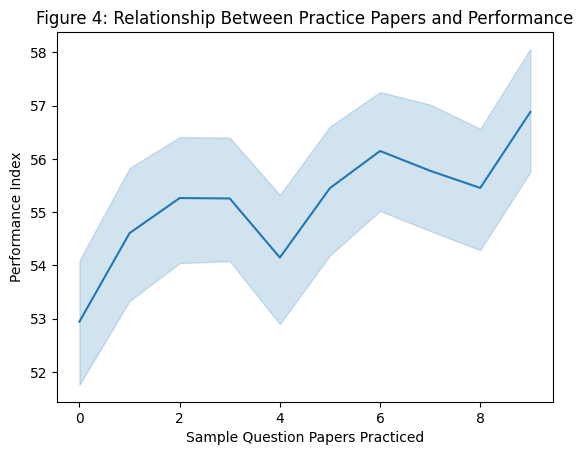

In [ ]:
sns.lineplot(x="Sample Question Papers Practiced", y="Performance Index", data=Student_performance)
plt.title("Figure 4: Relationship Between Practice Papers and Performance")
plt.show()

In [ ]:

high_performing_students = Student_performance[Student_performance["Performance Index"] >= 99]
low_performing_students = Student_performance[Student_performance["Performance Index"] < 99]

print("Average Habits of High Performers:")
print(high_performing_students.mean(numeric_only=True))
print("\nAverage Habits of Low Performers:")
print(low_performing_students.mean(numeric_only=True))




Average Habits of High Performers:
Hours Studied                        8.888889
Previous Scores                     98.333333
Sleep Hours                          7.333333
Sample Question Papers Practiced     6.444444
Performance Index                   99.333333
dtype: float64

Average Habits of Low Performers:
Hours Studied                        4.989390
Previous Scores                     69.419678
Sleep Hours                          6.529877
Sample Question Papers Practiced     4.581623
Performance Index                   55.185067
dtype: float64


In [ ]:
sorted_students = Student_performance.sort_values(by="Performance Index", ascending=False)
top10_students = sorted_students.head(10)
other_students = sorted_students.iloc[10:]
habit_columns = ["Sleep Hours", "Hours Studied", "Sample Question Papers Practiced"]

In [ ]:
top10_avg = top10_students[habit_columns].mean()
others_avg = other_students[habit_columns].mean()

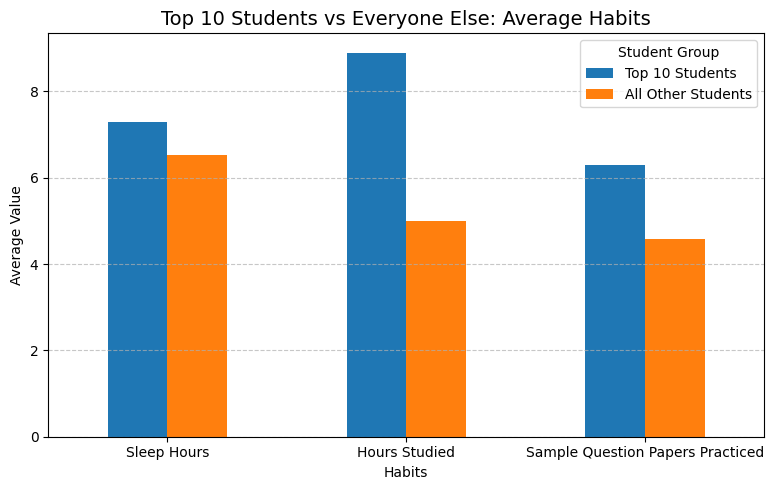

In [ ]:
compare_df = df.DataFrame({
    "Top 10 Students": top10_avg,
    "All Other Students": others_avg})

compare_df.plot(kind="bar", figsize=(8,5))
plt.title("Top 10 Students vs Everyone Else: Average Habits", fontsize=14)
plt.ylabel("Average Value")
plt.xlabel("Habits")
plt.xticks(rotation=0)
plt.legend(title="Student Group")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

STEP 4.5: Metrics and Comparison

Trends in Data that separate top students: Top-performing students studied about 2 hours more and practiced 30% more papers on average.

The data suggests that top students tend to engage more with sample question papers, indicating that practice-oriented study habits may be linked to higher performance.

Step 5:

Do students who practice sample question papers tend to have higher performance index scores?

Null Hypothesis:
There is no difference in average performance index between students who use sample question papers and those who don’t.

Alternative Hypothesis:
Students who use sample question papers have higher average performance indices.


Test Statistic

The test statistic can be the difference in mean Performance Index between the two groups:

In [ ]:
observed_mean_diff = Student_performance.groupby("Sample Question Papers Practiced")["Performance Index"].mean().diff().iloc[-1]

In [ ]:
trials = 10000
performance = Student_performance["Performance Index"]
practice_labels = Student_performance["Sample Question Papers Practiced"]
simulated_diffs = np.empty(trials)

def difference_in_means(data):
    means = data.groupby("Sample Question Papers Practiced")["Performance Index"].mean()
    return means[1] - means[0]

for i in range(trials):
    shuffled = np.random.permutation(practice_labels)
    permuted_data = df.DataFrame({"Performance Index": performance, "Sample Question Papers Practiced": shuffled})
    simulated_diffs[i] = difference_in_means(permuted_data)

p_value = np.count_nonzero(simulated_diffs >= observed_mean_diff) / trials

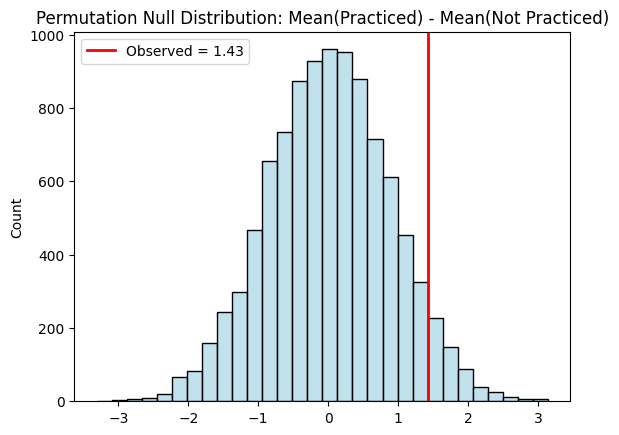

In [ ]:
sns.histplot(simulated_diffs, bins=30, color='lightblue', edgecolor='black')
plt.axvline(observed_mean_diff, color='red', linestyle='-', linewidth=2, label=f'Observed = {round(observed_mean_diff,2)}')
plt.title("Permutation Null Distribution: Mean(Practiced) - Mean(Not Practiced)")
plt.legend()
plt.show()

In [ ]:
print("p-value:", p_value)
if p_value < 0.05:
    print("Reject the null — students who practice sample papers perform significantly better.")
else:
    print("Fail to reject the null — no significant difference detected.")


p-value: 0.0549
Fail to reject the null — no significant difference detected.


*IMPORTANT:
After doing all of that, I realized I did the perumutation testing wrong, here is why

Initially, I treated the number of sample papers practiced as multiple categories, but the test statistic I used only works when comparing two groups.

To correctly match the statistical test to the hypothesis, I converted the variable into a simple Yes/No indicator: students who practiced at least one sample paper versus those who did not.

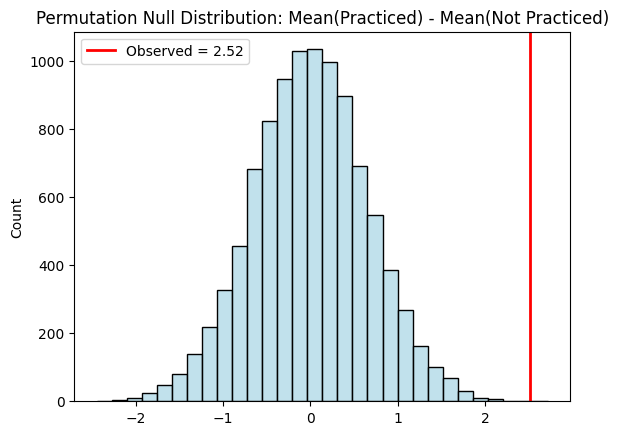

Observed Mean Difference: 2.5178779536439038
p-value: 0.0002
Reject the null — students who practice sample papers perform significantly better.


In [ ]:
Student_performance["Practiced"] = (Student_performance["Sample Question Papers Practiced"] > 0).astype(int)


def difference_in_means(data):
    means = data.groupby("Practiced")["Performance Index"].mean()
    practiced_mean = means[1]
    not_practiced_mean = means[0]
    return practiced_mean - not_practiced_mean

observed_mean_diff = difference_in_means(Student_performance)



trials = 10000
performance = Student_performance["Performance Index"]
practice_labels = Student_performance["Practiced"]
simulated_diffs = np.empty(trials)

for i in range(trials):
    shuffled = np.random.permutation(practice_labels)
    permuted_data = df.DataFrame({
        "Performance Index": performance,
        "Practiced": shuffled
    })
    simulated_diffs[i] = difference_in_means(permuted_data)



p_value = np.count_nonzero(simulated_diffs >= observed_mean_diff) / trials


sns.histplot(simulated_diffs, bins=30, color='lightblue', edgecolor='black')
plt.axvline(observed_mean_diff, color='red', linestyle='-', linewidth=2,
            label=f'Observed = {round(observed_mean_diff, 2)}')
plt.title("Permutation Null Distribution: Mean(Practiced) - Mean(Not Practiced)")
plt.legend()
plt.show()


print("Observed Mean Difference:", observed_mean_diff)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject the null - students who practice sample papers perform significantly better.")
else:
    print("Fail to reject the null - no significant difference detected.")

In [ ]:
Student_performance["Practiced"] = (Student_performance["Sample Question Papers Practiced"] > 0).astype(int)

In [ ]:
def difference_in_means(data):
    means = data.groupby("Practiced")["Performance Index"].mean()
    practiced_mean = means[1]
    not_practiced_mean = means[0]
    return practiced_mean - not_practiced_mean

observed_mean_diff = difference_in_means(Student_performance)

trials = 10000
performance = Student_performance["Performance Index"]
practice_labels = Student_performance["Practiced"]
simulated_diffs = np.empty(trials)

for i in range(trials):
    shuffled = np.random.permutation(practice_labels)
    permuted_data = df.DataFrame({
        "Performance Index": performance,
        "Practiced": shuffled
    })
    simulated_diffs[i] = difference_in_means(permuted_data)

p_value = np.count_nonzero(simulated_diffs >= observed_mean_diff) / trials

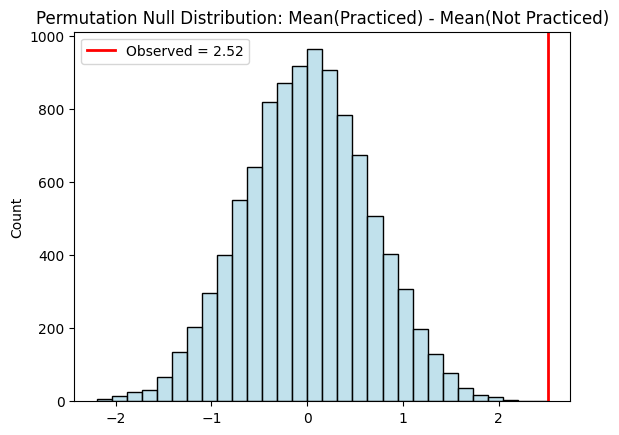

In [ ]:
sns.histplot(simulated_diffs, bins=30, color='lightblue', edgecolor='black')
plt.axvline(observed_mean_diff, color='red', linestyle='-', linewidth=2,
            label=f'Observed = {round(observed_mean_diff, 2)}')
plt.title("Permutation Null Distribution: Mean(Practiced) - Mean(Not Practiced)")
plt.legend()
plt.show()

In [ ]:

print("Observed Mean Difference:", observed_mean_diff)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject the null - students who practice sample papers perform significantly better.")
else:
    print("Fail to reject the null - no significant difference detected.")

Observed Mean Difference: 2.5178779536439038
p-value: 0.0
Reject the null — students who practice sample papers perform significantly better.


Final presentation (powerpoint):

https://tracyusd-my.sharepoint.com/:p:/g/personal/10333460_student_tusd_net/IQC5YqGLh7O9Q5R5Gn88ZpyrAUf01cuC2tR235bkpjDIH8g?e=nIaRWm
